In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv(r"C:\Users\sai kumar\Downloads\2_Logistic Regression\Logistic Regression\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


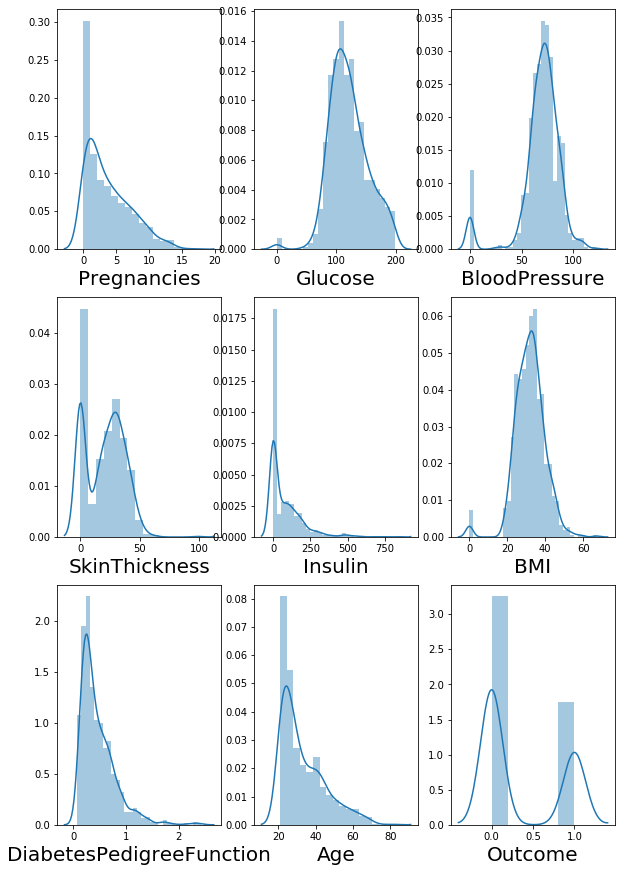

In [5]:
plt.figure(figsize=(10,15))
plotnum=1

for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnum+=1
plt.show()

In [6]:
data["Insulin"]=data["Insulin"].replace(0 , data["Insulin"].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())


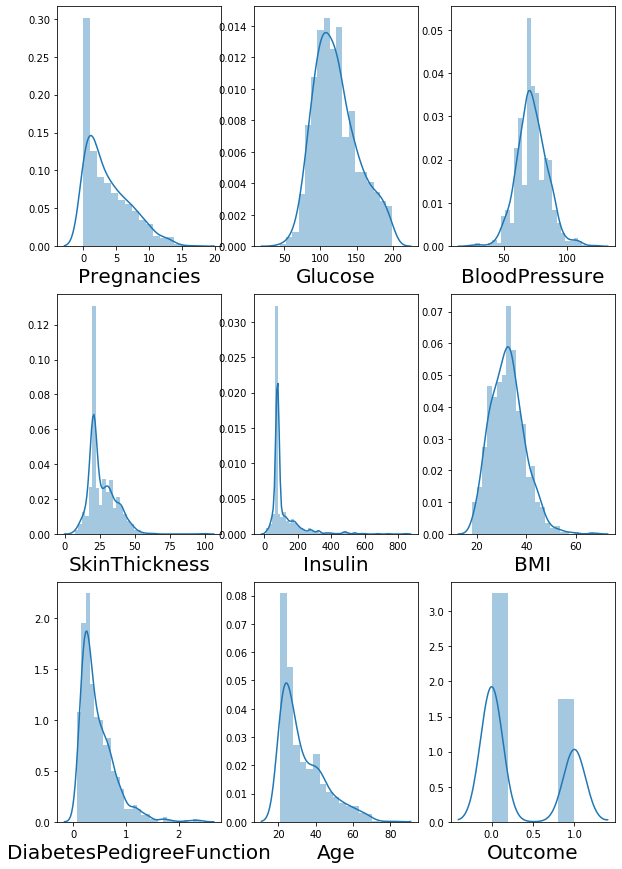

In [7]:
plt.figure(figsize=(10,15))
plotnum=1

for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnum+=1
plt.show()

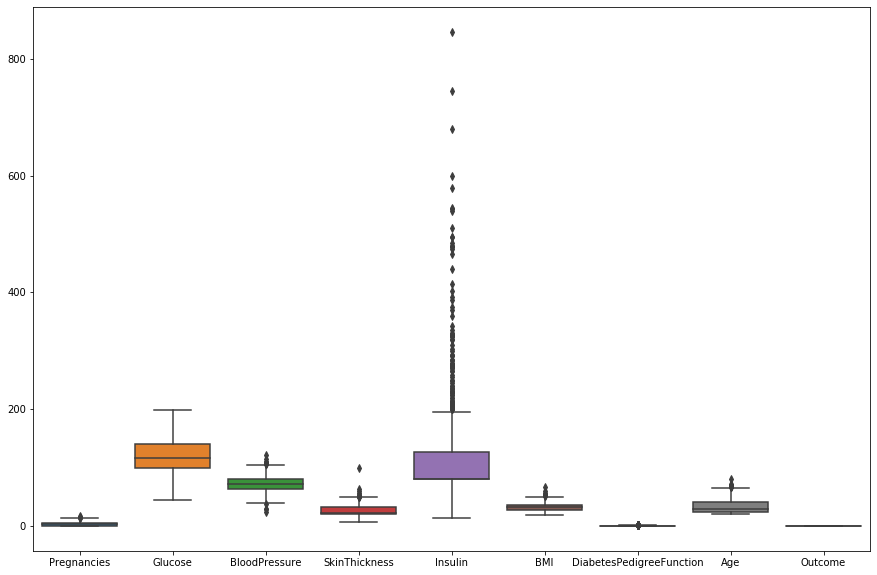

In [8]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax)

In [9]:
q=data["Pregnancies"].quantile(0.98)
data_cleaned=data[data["Pregnancies"]<q]

q=data["Insulin"].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned["Insulin"]<q]

q = data_cleaned['BMI'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

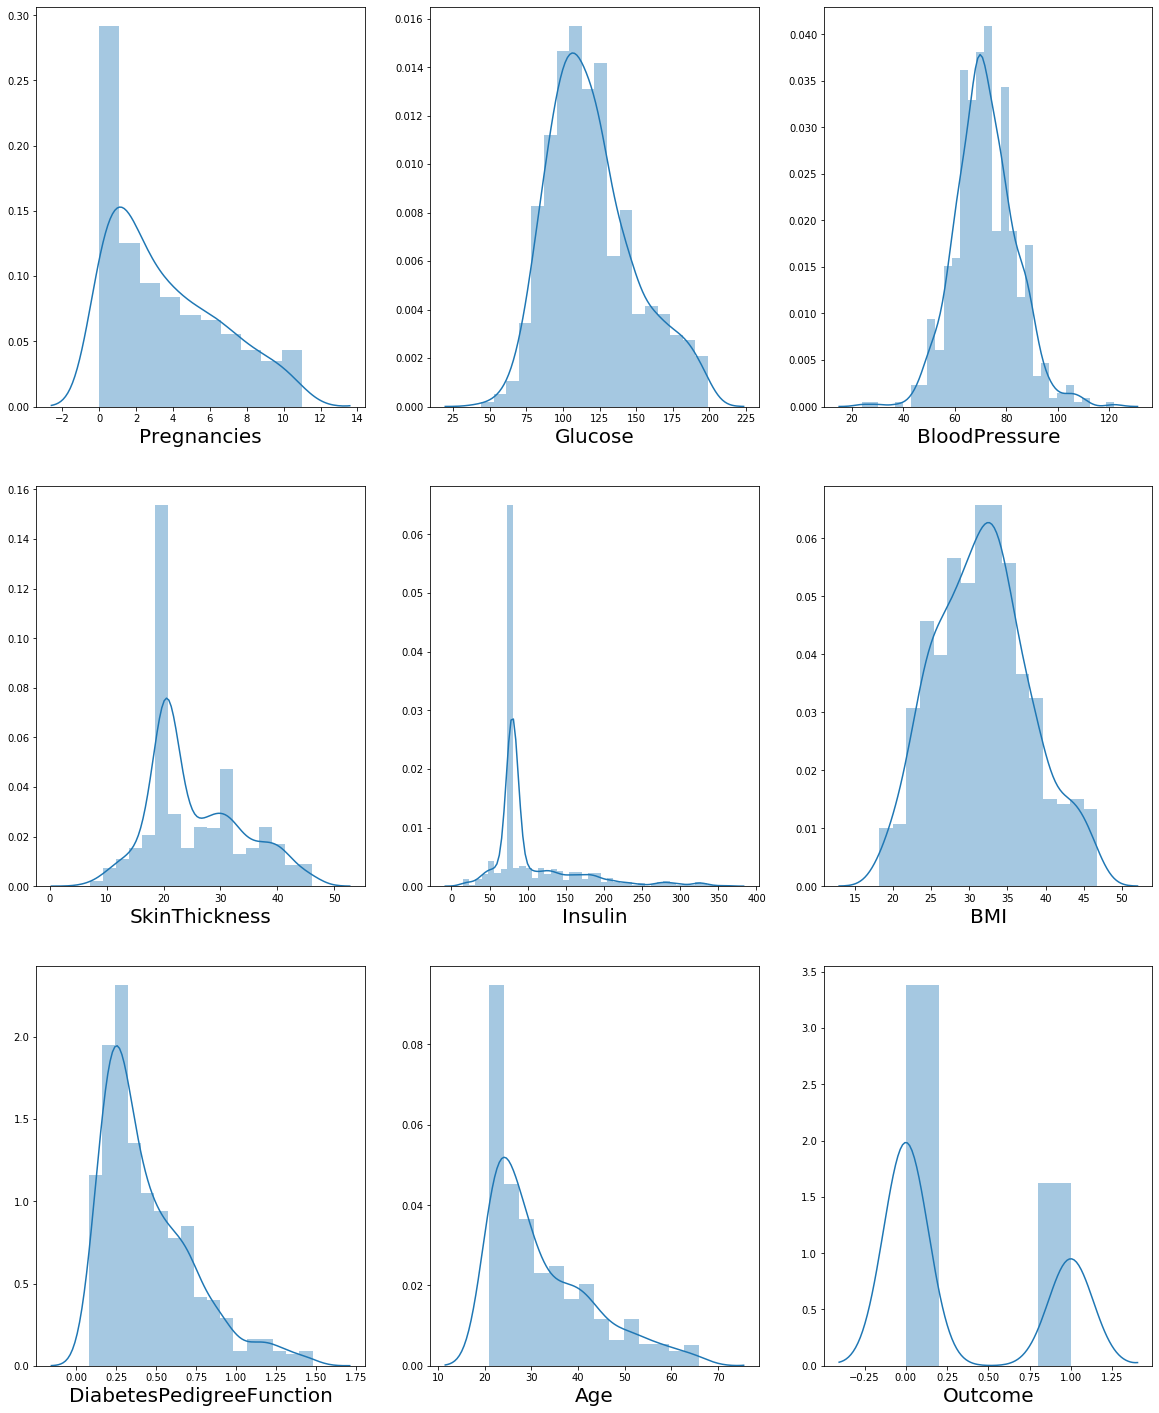

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [12]:
X=data_cleaned.drop(columns=["Outcome"])
y=data_cleaned["Outcome"]

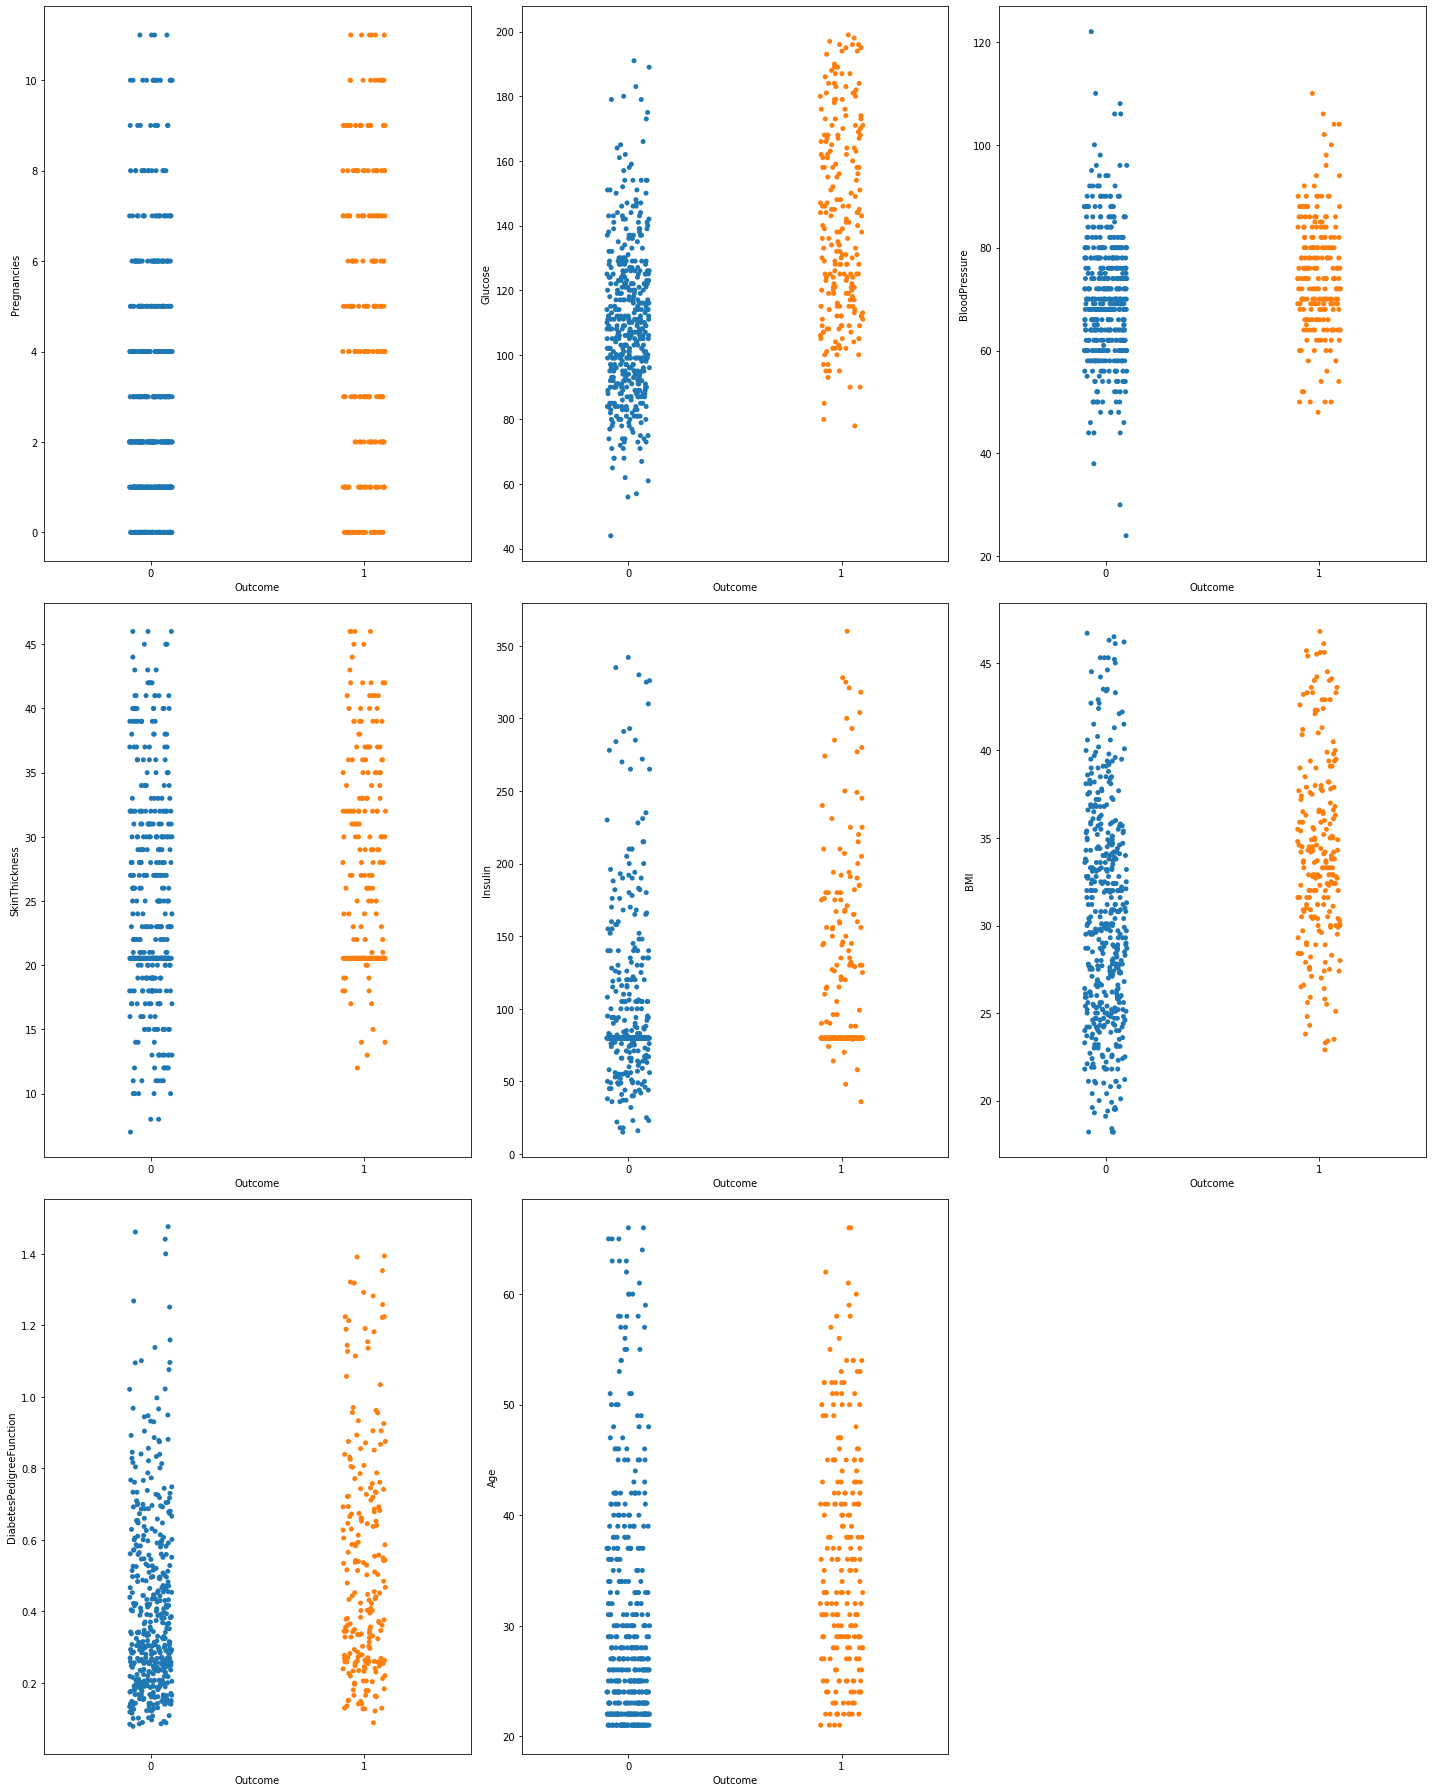

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [14]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.30, random_state = 35)

In [16]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn.score(x_train,y_train)

0.8301486199575372

In [18]:
y_pred=knn.predict(x_test)

In [19]:
accuracy_score(y_test,y_pred)

0.7227722772277227

In [20]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,19,20,25,27,30,32,34,36,38,40,42],
               'n_neighbors' : [9,10,11,12,13,15,17,19,21]
              }

In [21]:
gridsearch=GridSearchCV(knn,param_grid,verbose=2)

In [22]:
gridsearch.fit(x_train,y_train)

C:\Users\sai kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV] . algorithm=ball_tree, leaf_size=18, n_neighbors=9, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV] . algorithm=ball_tree, leaf_size=18, n_neighbors=9, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV] . algorithm=ball_tree, leaf_size=18, n_neighbors=9, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorith

[Parallel(n_jobs=1)]: Done 972 out of 972 | elapsed:   16.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 19, 20, 25, 27, 30, 32, 34, 36, 38,
                                       40, 42],
                         'n_neighbors': [9, 10, 11, 12, 13, 15, 17, 19, 21]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [23]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 17}

In [24]:
knn=KNeighborsClassifier(algorithm="ball_tree",leaf_size=18,n_neighbors=17)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [26]:
y_pred=knn.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.7277227722772277

In [28]:
cross_val_score(KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =17), x_scaled, y,cv=5)

array([0.77037037, 0.75555556, 0.76296296, 0.79850746, 0.79104478])

In [29]:
cross_val_score(KNeighborsClassifier(), x_scaled, y,cv=5).mean()

0.7519402985074628